## Statistical Techniques for Data Analytics

 Analyse of student perfomance based on hours of studied, hours of sleep, caffeine intake and level of stress

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv ("student_performance_dataset.csv")

In [4]:
df.head()

,Hours_Studied,Hours_Sleep,Caffeine_Intake,Stress,Exam_Score
0,22.5,4.9,4,No,94.1
1,19.3,6.4,5,No,96.2
2,23.2,6.5,5,No,85.8
3,27.6,5.8,1,Yes,99.8
4,18.8,6.8,0,Yes,83.5


In [5]:
df.tail()

,Hours_Studied,Hours_Sleep,Caffeine_Intake,Stress,Exam_Score
95,12.7,7.6,3,No,78.6
96,21.5,5.7,4,No,88.2
97,21.3,7.2,3,Yes,83.5
98,20.0,7.1,0,No,92.0
99,18.8,5.3,0,No,90.7


In [11]:
stressed = df[df['Stress'].str.lower().isin(['yes','y'])]['Exam_Score'].dropna()
non_stressed = df[df['Stress'].str.lower().isin(['no','n'])]['Exam_Score'].dropna()

### 1- Normality chck with Shapiro Wilk Test 

In [20]:
sh_stressed = stats.shapiro(stressed)
sh_non = stats.shapiro(non_stressed)

print(f"Shapiro stressed: W = {sh_stressed.statistic:.3f}, p = {sh_stressed.pvalue:.4f}")
print(f"Shapiro non-stressed: W = {sh_non.statistic:.3f}, p = {sh_non.pvalue:.4f}")

Shapiro stressed: W = 0.922, p = 0.0237
Shapiro non-stressed: W = 0.949, p = 0.0077


### 2- Parametric test 

In [21]:
t = stats.ttest_ind(stressed, non_stressed, equal_var=False)

print(f"Welch t-test: t = {t.statistic:.3f}, p = {t.pvalue:.4f}")

Welch t-test: t = -2.843, p = 0.0062


### 3- Non-Parametric test

In [25]:
U = stats.mannwhitneyu(stressed, non_stressed, alternative='two-sided')
print(f"Mann–Whitney U test: U = {u.statistic:.1f}, p = {U.pvalue:.4f}")

Mann–Whitney U test: U = 666.5, p = 0.0019


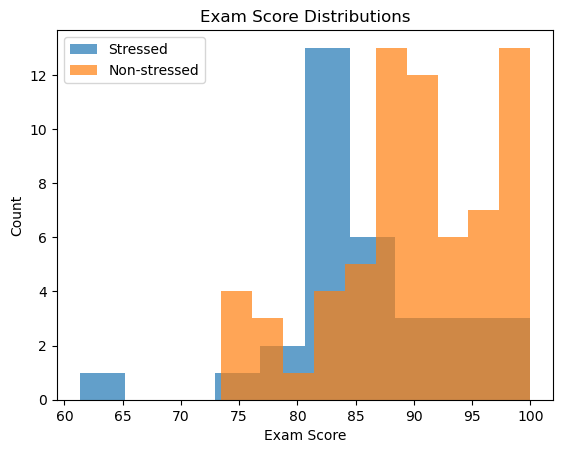

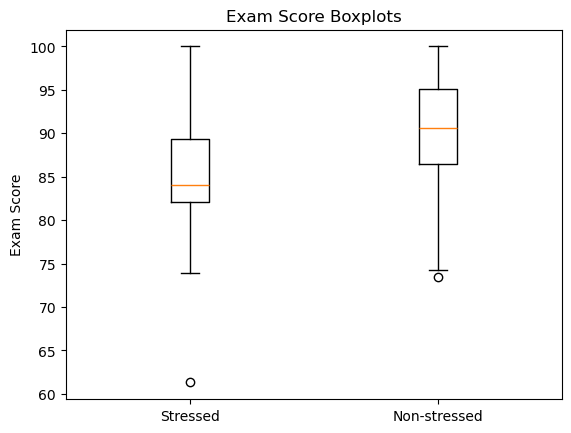

In [26]:
plt.figure()
plt.hist(stressed, alpha=0.7, label='Stressed')
plt.hist(non_stressed, alpha=0.7, label='Non-stressed')
plt.xlabel('Exam Score')
plt.ylabel('Count')
plt.legend()
plt.title('Exam Score Distributions')
plt.show()

plt.figure()
plt.boxplot([stressed, non_stressed], tick_labels=['Stressed','Non-stressed'])
plt.ylabel('Exam Score')
plt.title('Exam Score Boxplots')
plt.show()

## Multiple Regression Model 

In [30]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import statsmodels.api as sm

In [31]:
df = pd.read_csv("student_performance_dataset.csv")

In [36]:
print(df.columns)
df.head()

Index(['Hours_Studied', 'Hours_Sleep', 'Caffeine_Intake', 'Stress',
       'Exam_Score'],
      dtype='object')


,Hours_Studied,Hours_Sleep,Caffeine_Intake,Stress,Exam_Score
0,22.5,4.9,4,No,94.1
1,19.3,6.4,5,No,96.2
2,23.2,6.5,5,No,85.8
3,27.6,5.8,1,Yes,99.8
4,18.8,6.8,0,Yes,83.5


In [33]:
X = df[["Hours_Studied", "Hours_Sleep", "Caffeine_Intake"]].copy()
y = df["Exam_Score"].copy()

In [39]:
data = pd.concat([X, y], axis=1).dropna()
X = data[["Hours_Studied", "Hours_Sleep", "Caffeine_Intake"]]
y = data["Exam_Score"]


In [40]:
print("Rows:", len(data))
data.head()

Rows: 100


,Hours_Studied,Hours_Sleep,Caffeine_Intake,Exam_Score
0,22.5,4.9,4,94.1
1,19.3,6.4,5,96.2
2,23.2,6.5,5,85.8
3,27.6,5.8,1,99.8
4,18.8,6.8,0,83.5


In [46]:
X_const = sm.add_constant(X) 
model = sm.OLS(y, X_const).fit()

### Finding the strongest predictor

Standardized regression coefficient were used to identify the strongest predictor of exam perfomance

In [47]:
Xz = X.apply(zscore)
yz = zscore(y)

Xz_const = sm.add_constant(Xz)
model_z = sm.OLS(yz, Xz_const).fit()

std_betas = model_z.params.drop("const")
std_betas_abs = std_betas.abs().sort_values(ascending=False)

print("Biggest value = stronger predictor):")
print(std_betas.sort_values(key=np.abs, ascending=False).round(3))

strongest = std_betas_abs.index[0]
print("\nStrongest predictor:", strongest)


Biggest value = stronger predictor):
Hours_Studied      0.724
Hours_Sleep        0.283
Caffeine_Intake   -0.197
dtype: float64

Strongest predictor: Hours_Studied


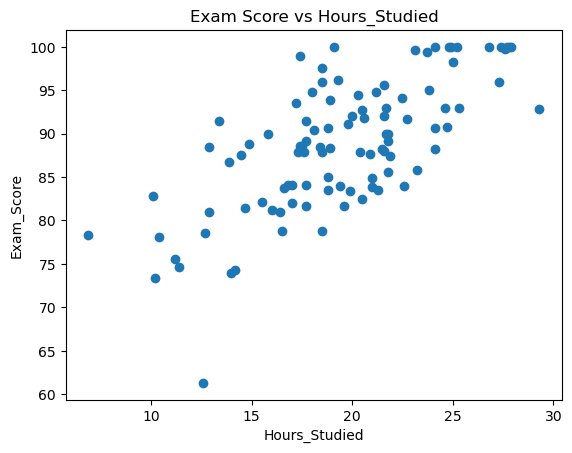

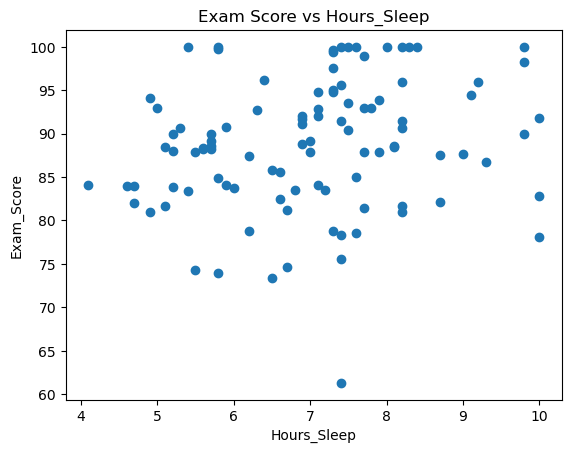

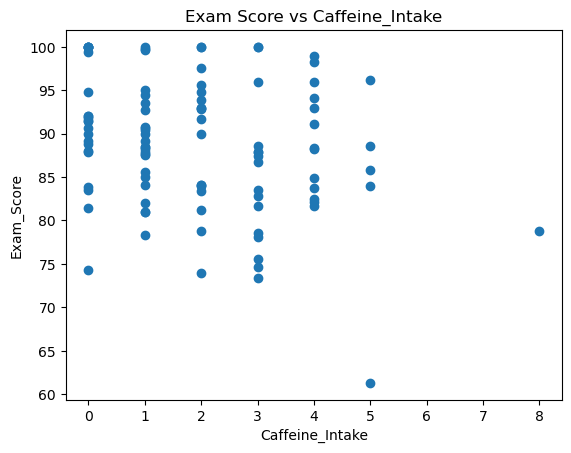

In [48]:
import matplotlib.pyplot as plt

for col in ["Hours_Studied", "Hours_Sleep", "Caffeine_Intake"]:
    plt.figure()
    plt.scatter(X[col], y)
    plt.xlabel(col)
    plt.ylabel("Exam_Score")
    plt.title(f"Exam Score vs {col}")
    plt.show()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# Variáveis explicativas (X) e variável resposta (y)
X = df[["Hours_Studied", "Hours_Sleep", "Caffeine_Intake"]]
y = df["Exam_Score"]

# Divisão treino (70%) / teste (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 70
Test size: 30


In [53]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [54]:
y_pred = model.predict(X_test)

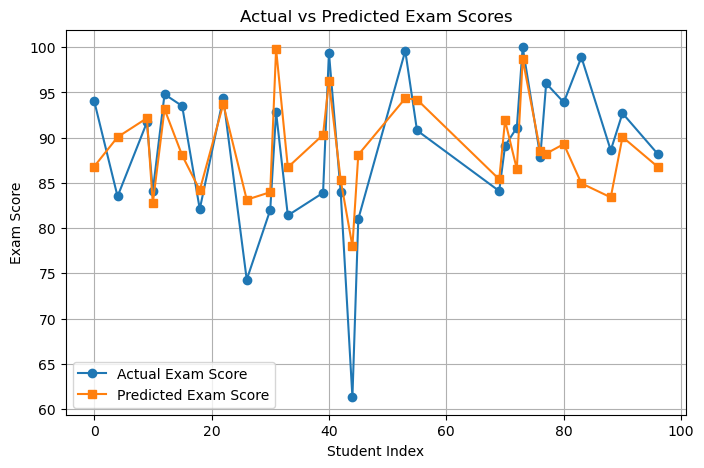

In [55]:
y_test_sorted = y_test.sort_index()

y_pred_sorted = y_pred[np.argsort(y_test.index)]

plt.figure(figsize=(8,5))
plt.plot(y_test_sorted.index, y_test_sorted.values,
         marker='o', label="Actual Exam Score")
plt.plot(y_test_sorted.index, y_pred_sorted,
         marker='s', label="Predicted Exam Score")

plt.xlabel("Student Index")
plt.ylabel("Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.legend()
plt.grid(True)
plt.show()


### The predicted exam scores follow the general pattern of the sctual scores, showing that the regression model perform weel but not perfect. 

In [63]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

import statsmodels.api as sm
from scipy.stats import zscore


In [64]:
df = pd.read_csv("student_performance_dataset.csv")
print("Columns:", df.columns.tolist())
df.head()

Columns: ['Hours_Studied', 'Hours_Sleep', 'Caffeine_Intake', 'Stress', 'Exam_Score']


,Hours_Studied,Hours_Sleep,Caffeine_Intake,Stress,Exam_Score
0,22.5,4.9,4,No,94.1
1,19.3,6.4,5,No,96.2
2,23.2,6.5,5,No,85.8
3,27.6,5.8,1,Yes,99.8
4,18.8,6.8,0,Yes,83.5


In [73]:
PASS_MARK = 40
df["Fail"] = (df["Exam_Score"] < PASS_MARK).astype(int)

print("Fail counts (0=Pass, 1=Fail):")
print(df["Fail"].value_counts(dropna=False))

Fail counts (0=Pass, 1=Fail):
Fail
0    100
Name: count, dtype: int64


### In this dataset, all students achieved the exams scores above the passa mark of 40. Therefore, a classification model for exam failure could not be trained because only one outcome was present. As a result, an assumed probability of failure was used to demonstrate the expected value calculation. 